# Linear Regression

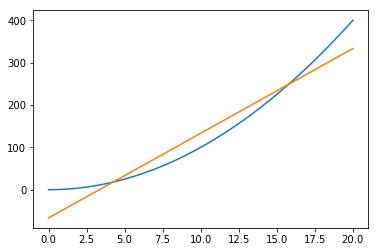

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

def LinearRegression(X,y,alpha=0.1,lamda=0.1,iteraciones=1000):   
    if X.ndim > 1:
        [M,N] = X.shape
    else:
        M = X.shape[0]
        N = 1
        X = X[:,None]

    VectorBias = np.ones(shape=(M,1))
    X = np.concatenate((VectorBias,X),axis=1)
    
    theta = np.random.rand(N+1,1)
    for j in range(0,iteraciones):

        h_x = np.dot(X,theta)
        J = 1/(2*M)*np.dot((h_x-y).T,(h_x-y))

        dJ_dtheta = np.dot((np.dot(X,theta)-y).T,X).T
        theta = theta - alpha/M * dJ_dtheta
    
        theta[1:] = theta[1:] - alpha*lamda/M*theta[1:] #Regularization
    return theta
    
Z = np.linspace(0,20,1000)    
w = Z**2
w = w[:,None]

plt.plot(Z,w)

Z_norm = scale(Z)

theta = LinearRegression(Z_norm,w,alpha=0.1)


M = Z_norm.shape[0]
VectorBias = np.ones(shape=(M,1))
X=np.concatenate((VectorBias,Z_norm[:,None]),axis=1)
plt.plot(Z,np.dot(X,theta))
plt.show()

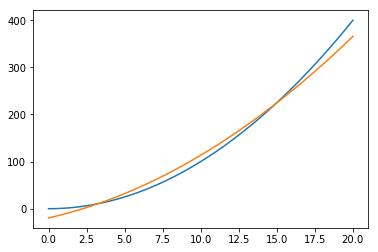

In [5]:
plt.plot(Z,w)

Z2 = np.concatenate((Z[:,None],Z[:,None]**2),axis=1)

Z_norm = scale(Z2,axis=0)

theta = LinearRegression(Z_norm,w,alpha=0.1,lamda=100)

M = Z_norm.shape[0]
VectorBias = np.ones(shape=(M,1))
X=np.concatenate((VectorBias,Z_norm),axis=1)
plt.plot(Z2[:,0],np.dot(X,theta))
plt.show()

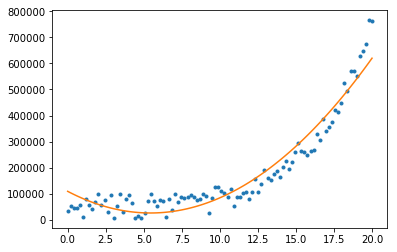

In [6]:
Z = np.linspace(0,20,100)    
w = -2*Z**3 + Z**4.5 + 100000*np.random.rand(Z.shape[0])
w = w[:,None]
plt.plot(Z,w,'.')

Z2 = np.concatenate((Z[:,None],Z[:,None]**2),axis=1)

Z_norm = scale(Z2,axis=0)

theta = LinearRegression(Z_norm,w,alpha=0.1)

M = Z_norm.shape[0]
VectorBias = np.ones(shape=(M,1))
X=np.concatenate((VectorBias,Z_norm),axis=1)
plt.plot(Z2[:,0],np.dot(X,theta))

plt.show()

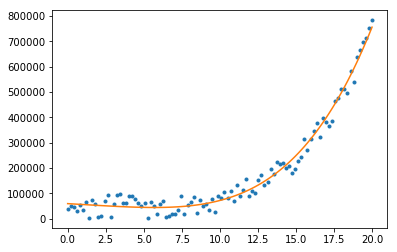

In [7]:
Z = np.linspace(0,20,100)    
w = -2*Z**3 + Z**4.5 + 100000*np.random.rand(Z.shape[0])
w = w[:,None]
plt.plot(Z,w,'.')

Z2 = np.concatenate((Z[:,None],Z[:,None]**4),axis=1)

Z_norm = scale(Z2,axis=0)

theta = LinearRegression(Z_norm,w,alpha=0.1)

M = Z_norm.shape[0]
VectorBias = np.ones(shape=(M,1))
X=np.concatenate((VectorBias,Z_norm),axis=1)
plt.plot(Z2[:,0],np.dot(X,theta))

plt.show()

<IPython.core.display.Javascript object>


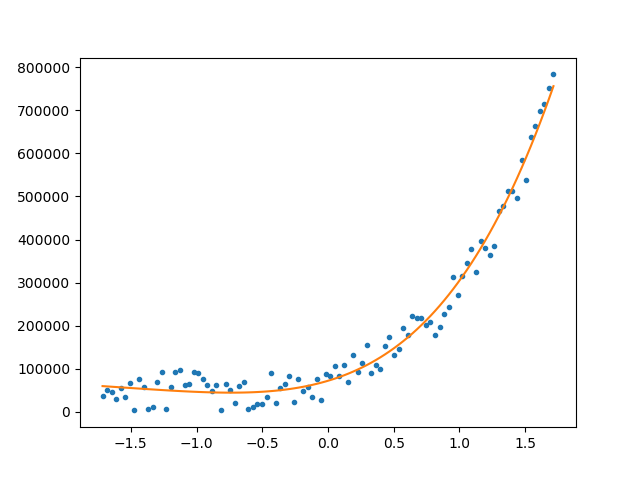

In [8]:
%matplotlib notebook



def IlustrativeLinearRegression(X,y,alpha=0.1,lamda=0.1,iteraciones=1000):  
    X = scale(X,axis=0)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    plt.ion()
    fig.show()
    fig.canvas.draw()

    if X.ndim > 1:
        [M,N] = X.shape
    else:
        M = X.shape[0]
        N = 1
        X = X[:,None]

    VectorBias = np.ones(shape=(M,1))
    X = np.concatenate((VectorBias,X),axis=1)
    
    theta = np.random.rand(N+1,1)
    for j in range(0,iteraciones):
        ax.clear()
        h_x = np.dot(X,theta)
        J = 1/(2*M)*np.dot((h_x-y).T,(h_x-y))

        dJ_dtheta = np.dot((np.dot(X,theta)-y).T,X).T
        theta = theta - alpha/M * dJ_dtheta
    
        theta[1:] = theta[1:] - alpha*lamda/M*theta[1:] #Regularization
        plt.plot(X[:,1],y,'.')
        plt.plot(X[:,1],np.dot(X,theta))
        
        fig.canvas.draw()
        
    return theta

theta = IlustrativeLinearRegression(Z2,w,alpha=0.1)

# Regression with KNN

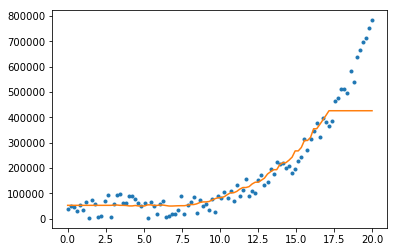

In [12]:
%matplotlib inline

def KnnRegression(Xdatabase,Xtest,Ydatabase,k=5):  
    M = Xtest.shape[0]
    
    Yout = np.zeros(shape=(Xtest.shape[0],1))
    
    for i in range(0,M):
        distance = np.linalg.norm(Xtest[i]-Xdatabase,axis=1)
        indices = np.argsort(distance)[:k]
        Yout[i] = np.mean(Ydatabase[indices])
    
    return Yout
        
y = KnnRegression(Z[:,None],Z[:,None],w,k=30)


plt.plot(Z,w,'.')
plt.plot(Z,y)

# Regression parzen window

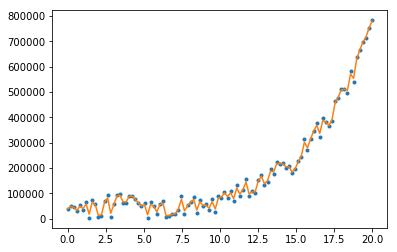

In [15]:
def ParzenWindow(Xdatabase,Xtest,Ydatabase,h=1):  
    M = Xtest.shape[0]
    
    Yout = np.zeros(shape=(Xtest.shape[0],1))
    
    for i in range(0,M):
        distance = np.linalg.norm(Xtest[i]-Xdatabase,axis=1)
        u= distance/h
        k_u = np.exp((-1/2)*(u)**2)
        Yout[i] = np.sum(k_u[:,None]*Ydatabase)/np.sum(k_u[:,None])

        
    return Yout
        
y = ParzenWindow(Z[:,None],Z[:,None],w,h=0.1)


plt.plot(Z,w,'.')
plt.plot(Z,y)
plt.show()